## Task - 5p

* **Name :** M.Rachel
* **Student No. :** 224234147
* **Deakin Mail :** s224234147@deakin.edu.au
* **Email Address:** rachelriney1608@gmail.com

### PROBLEM STATEMENT

The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed. There are no missing values

### Features

* age
* job	
* marital	
* education
* default
* balance
* housing	
* loan
* contact
* day
* month
* duration
* campaign
* pdays
* previous
* poutcome

### Target

y- deposit subscription



#### 1. Load “bank-full.csv” dataset and create a logistic regression model for predicting target variable (subscribed a term deposit or not). Use appropriate evaluation methods and report the performance of the model using appropriate metrics.

In [1]:
# Import Necessary Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
#load the dataset
data = pd.read_csv("F:/Data Science/Datasets/bank-full.csv", sep=';')

In [3]:
#dimensions of the data
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [18]:
data.shape

(45211, 17)

In [4]:
# Convert categorical variables to numerical variables
data['job'] = pd.Categorical(data['job']).codes
data['marital'] = pd.Categorical(data['marital']).codes
data['education'] = pd.Categorical(data['education']).codes
data['default'] = pd.Categorical(data['default']).codes
data['housing'] = pd.Categorical(data['housing']).codes
data['loan'] = pd.Categorical(data['loan']).codes
data['contact'] = pd.Categorical(data['contact']).codes
data['month'] = pd.Categorical(data['month']).codes
data['poutcome'] = pd.Categorical(data['poutcome']).codes

In [5]:
# Split the dataset into features (X) and target (y)
X = data.drop('y', axis=1)
y = data['y']

In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
#Logistic regression
log_reg = LogisticRegression()

# Train the model
log_reg.fit(X_train, y_train)

LogisticRegression()

In [9]:
# Make predictions
y_pred = log_reg.predict(X_test)

y_proba = log_reg.predict_proba(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, y_proba[:, 1]))

Accuracy: 0.8839986730067455
Classification Report:
              precision    recall  f1-score   support

          no       0.90      0.98      0.94      7952
         yes       0.56      0.18      0.27      1091

    accuracy                           0.88      9043
   macro avg       0.73      0.58      0.60      9043
weighted avg       0.86      0.88      0.86      9043

Confusion Matrix:
[[7803  149]
 [ 900  191]]
ROC-AUC Score: 0.8157499073266363


In [10]:
from sklearn.model_selection import GridSearchCV

# Define the hyperparameter space
param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.1, 1, 10],
    'max_iter': [500, 1000, 2000]
}

grid_search = GridSearchCV(LogisticRegression(), param_grid, cv=5, scoring='roc_auc')

# Perform the grid search
grid_search.fit(X_train, y_train)

# Print the best parameters and the corresponding score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

# Create an optimized model with the best parameters
optimized_model = LogisticRegression(**grid_search.best_params_)
optimized_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_optimized = optimized_model.predict(X_test)

# Evaluate the optimized model
print("Accuracy (Optimized Model):", accuracy_score(y_test, y_pred_optimized))
print("Classification Report (Optimized Model):")
print(classification_report(y_test, y_pred_optimized))
print("Confusion Matrix (Optimized Model):")
print(confusion_matrix(y_test, y_pred_optimized))
print("ROC-AUC Score (Optimized Model):", roc_auc_score(y_test, optimized_model.predict_proba(X_test)[:, 1]))

Best Parameters: {'C': 0.1, 'max_iter': 2000, 'penalty': 'l2'}
Best Score: 0.8587501447105925
Accuracy (Optimized Model): 0.8857679973460135
Classification Report (Optimized Model):
              precision    recall  f1-score   support

          no       0.90      0.98      0.94      7952
         yes       0.58      0.20      0.30      1091

    accuracy                           0.89      9043
   macro avg       0.74      0.59      0.62      9043
weighted avg       0.86      0.89      0.86      9043

Confusion Matrix (Optimized Model):
[[7791  161]
 [ 872  219]]
ROC-AUC Score (Optimized Model): 0.853617350297938


#### 2. Have you used any hyperparameter tuning while building the model in Q1? If yes, then plot the performances that were obtained at different steps of optimisation. Otherwise, create an optimised model and compare performance with Q1.

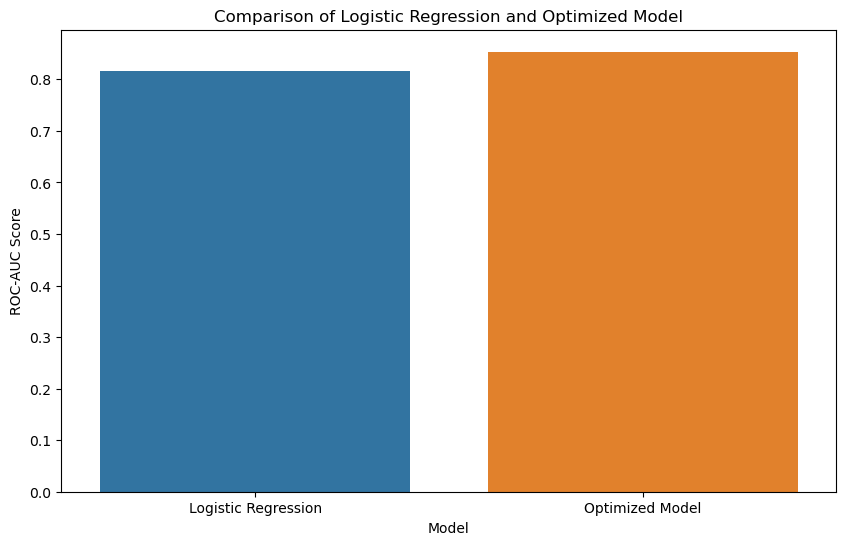

In [14]:
# Plot the comparison
plt.figure(figsize=(10, 6))
sns.barplot(x=["Logistic Regression", "Optimized Model"], y=[roc_auc_score(y_test, log_reg.predict_proba(X_test)[:, 1]), roc_auc_score(y_test, optimized_model.predict_proba(X_test)[:, 1])])
plt.xlabel('Model')
plt.ylabel('ROC-AUC Score')
plt.title('Comparison of Logistic Regression and Optimized Model')
plt.show()

* Both models performed with slightly same accuaracy with slight difference of optimized model performed better.

#### 3. Create two ensemble ML models for predicting the target variable using the evaluation setting that you have used in Q1 and report the performance.

In [15]:
# Model1
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

# Create a random forest classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)


# Evaluate the model using cross-validation
scores = cross_val_score(rf_model, X, y, cv=5, scoring='roc_auc')

print("Random Forest Classifier Performance:")
print("ROC-AUC Score:", scores.mean())
print("Standard Deviation:", scores.std())

Random Forest Classifier Performance:
ROC-AUC Score: 0.5433606491407303
Standard Deviation: 0.09010307903713476


In [20]:
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

y_proba_rf = rf_model.predict_proba(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, y_proba_rf[:, 1]))

Accuracy: 0.8839986730067455
Classification Report:
              precision    recall  f1-score   support

          no       0.90      0.98      0.94      7952
         yes       0.56      0.18      0.27      1091

    accuracy                           0.88      9043
   macro avg       0.73      0.58      0.60      9043
weighted avg       0.86      0.88      0.86      9043

Confusion Matrix:
[[7803  149]
 [ 900  191]]
ROC-AUC Score: 0.9245165654790337


In [17]:
#Model2
from sklearn.ensemble import GradientBoostingClassifier

# Create a gradient boosting classifier
gb_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)

# Evaluate the model using cross-validation
scores = cross_val_score(gb_model, X, y, cv=5, scoring='roc_auc')

print("Gradient Boosting Classifier Performance:")
print("ROC-AUC Score:", scores.mean())
print("Standard Deviation:", scores.std())

Gradient Boosting Classifier Performance:
ROC-AUC Score: 0.6669399860499718
Standard Deviation: 0.09124171012079219


In [21]:
gb_model.fit(X_train, y_train)

y_pred_gb = gb_model.predict(X_test)

y_proba_gb = gb_model.predict_proba(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, y_proba_gb[:, 1]))

Accuracy: 0.8839986730067455
Classification Report:
              precision    recall  f1-score   support

          no       0.90      0.98      0.94      7952
         yes       0.56      0.18      0.27      1091

    accuracy                           0.88      9043
   macro avg       0.73      0.58      0.60      9043
weighted avg       0.86      0.88      0.86      9043

Confusion Matrix:
[[7803  149]
 [ 900  191]]
ROC-AUC Score: 0.9203368123498091


#### 4. Compare the performance of the three models (Q1 and Q3), explain which model is good and why

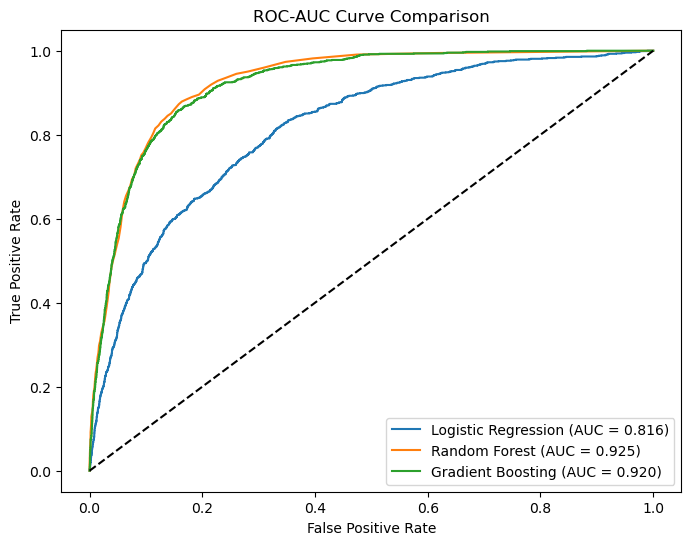

In [26]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc


y_test_binary = y_test.map({'no': 0, 'yes': 1})
# Calculate the ROC-AUC curve for each model
fpr_lr, tpr_lr, _ = roc_curve(y_test_binary, y_proba[:, 1])
fpr_rf, tpr_rf, _ = roc_curve(y_test_binary, y_proba_rf[:, 1])
fpr_gb, tpr_gb, _ = roc_curve(y_test_binary, y_proba_gb[:, 1])

# Calculate the AUC for each model
auc_lr = auc(fpr_lr, tpr_lr)
auc_rf = auc(fpr_rf, tpr_rf)
auc_gb = auc(fpr_gb, tpr_gb)

# Plot the ROC-AUC curve for each model
plt.figure(figsize=(8, 6))
plt.plot(fpr_lr, tpr_lr, label='Logistic Regression (AUC = {:.3f})'.format(auc_lr))
plt.plot(fpr_rf, tpr_rf, label='Random Forest (AUC = {:.3f})'.format(auc_rf))
plt.plot(fpr_gb, tpr_gb, label='Gradient Boosting (AUC = {:.3f})'.format(auc_gb))
plt.plot([0, 1], [0, 1], 'k--')  # random chance line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-AUC Curve Comparison')
plt.legend(loc='best')
plt.show()

## Conclusion:

* Compare to Logistic regression model, the ensemble models performed better with 88% accuracy with the roc-auc score of 0.92.

## REFERENCES

1) “UCI Machine Learning Repository,” archive.ics.uci.edu. https://archive.ics.uci.edu/dataset/222/bank+marketing
